# StackOverflow 2019 Review Data Analysis

In [1]:
# import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

#pd.set_option('max_columns', None) # set pandas to display all columns

## 1) Businss Understanding
Software engineering is described as one of the hottest jobs of the 21st century. Because of its technical nature, unlike many other professions, a college degree and advanced degree is not always required to get a job in the field. In order to undersatnd how opportunity varies between having a post high shcool education and not having, I seek to answer the folowing questions using StackOverflow 2019 reiew survey responses:
1. Are people with High School diploma as satisfied in their software engineering job/career as those with higher educational degrees?
2. Are people with high school degrees paid at same rate as people with college education?
3. How do they feel about becoming managers (growth opportunity)?

## 2) Data Understanding

**Get data**

In [2]:
df_main = pd.read_csv("./data/survey_results_public.csv")# read the dataset and store in 'df'
df_main.head(5) #display first five rows of the dataset

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


**Access**

In [3]:
num_rows = df_main.shape[0] # number of rows is equivalent to number of players 
num_columns = df_main.shape[1]
print('There are {} reponses and {} attributes'.format(num_rows,num_columns))

There are 88883 reponses and 85 attributes


In [4]:
# attributes for each response
df_main.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

**For better comparison, the analysis is limited to only the United States else additional factors such as work conditions and economy will need to be factored into the analysis**

In [5]:
df_main = df_main[df_main["Country"]=="United States"]
df_main[['Country']].nunique() # Get list of countries in the Country Columns

Country    1
dtype: int64

## 3) Data Preparation

**Clean**

In [6]:
# Remove unused columns
df_main = df_main[["Respondent", "Employment", "EdLevel", "EduOther", "OrgSize", "DevType", 
     "YearsCode", "YearsCodePro", "Age1stCode", "CareerSat", "JobSat", "CompTotal", 
     'ConvertedComp', "MgrIdiot", "MgrMoney", "MgrWant"]]
df_main.head(2)

,Respondent,Employment,EdLevel,EduOther,OrgSize,DevType,YearsCode,YearsCodePro,Age1stCode,CareerSat,JobSat,CompTotal,ConvertedComp,MgrIdiot,MgrMoney,MgrWant
3,4,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,Less than 1 year,16,Very satisfied,Slightly satisfied,61000.0,61000.0,Very confident,No,Not sure
12,13,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",Taken an online course in programming or softw...,10 to 19 employees,Data or business analyst;Database administrato...,17,8,11,Very satisfied,Very satisfied,90000.0,90000.0,NaN,NaN,NaN


In [7]:
df_main.dtypes

Respondent         int64
Employment        object
EdLevel           object
EduOther          object
OrgSize           object
DevType           object
YearsCode         object
YearsCodePro      object
Age1stCode        object
CareerSat         object
JobSat            object
CompTotal        float64
ConvertedComp    float64
MgrIdiot          object
MgrMoney          object
MgrWant           object
dtype: object

**Transform Data especially attributes like: YearsCode and YearsCodePro that have 'Less than 1 year' as a value**

In [8]:
# Convert the YearsCodePro to Number
def to_num(df, col):
    '''
    input: 
        df - dataframe 
        col - column name of attribute that needs to be converted
    output:
        df - dataframe with df[col] transformed to integers. non representable values are replaced with NaN
    '''
    df.dropna(subset=[col], inplace=True) 
    df = df.replace('Less than 1 year', '0')
    #df = df.replace('More than 50 years', '51')
    df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

df_main = to_num(df_main, 'YearsCodePro')
df_main = to_num(df_main, 'YearsCode')
df_main = to_num(df_main, 'Age1stCode')

**Missing values**

In [9]:
# Find proportion of the each atribute with missing values
print(df_main.isnull().sum()/len(df_main))

Respondent       0.000000
Employment       0.003230
EdLevel          0.007116
EduOther         0.017023
OrgSize          0.060157
DevType          0.029613
YearsCode        0.002792
YearsCodePro     0.000876
Age1stCode       0.004872
CareerSat        0.028245
JobSat           0.048333
CompTotal        0.183316
ConvertedComp    0.184903
MgrIdiot         0.179649
MgrMoney         0.179265
MgrWant          0.178718
dtype: float64


Rows and columns with NaN values are not removed at this stage. They will be removed accordingly as we answer each of the questions. 


In [10]:
df_main.describe()

,Respondent,YearsCode,YearsCodePro,Age1stCode,CompTotal,ConvertedComp
count,18269.000000,18218.000000,18253.000000,18180.000000,1.492000e+04,1.489100e+04
mean,44566.486562,14.933692,9.875308,15.259351,1.340483e+12,2.491618e+05
std,25558.740406,10.288632,8.927571,5.420642,1.157753e+14,4.515211e+05
min,4.000000,0.000000,0.000000,5.000000,0.000000e+00,0.000000e+00
25%,22529.000000,7.000000,3.000000,12.000000,7.500000e+04,8.000000e+04
50%,44539.000000,12.000000,7.000000,15.000000,1.020000e+05,1.100000e+05
75%,66695.000000,20.000000,14.000000,18.000000,1.400000e+05,1.600000e+05
max,88880.000000,50.000000,50.000000,66.000000,1.000000e+16,2.000000e+06


## 4) Answer questions

### 1. Are people with high school degrees paid at same rate as people with college education?


In [11]:
# Observe the distribution of the dataset based on educational level
df = df_main
counts = df.groupby('EdLevel').size().sort_values(ascending=False).reset_index(name='Count')
counts["Percentage"] = counts['Count'] / np.sum(counts['Count'])
counts

,EdLevel,Count,Percentage
0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",10442,0.575666
1,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",3418,0.188434
2,Some college/university study without earning ...,2195,0.121010
3,Associate degree,807,0.044490
4,"Other doctoral degree (Ph.D, Ed.D., etc.)",634,0.034952
5,"Secondary school (e.g. American high school, G...",421,0.023210
6,"Professional degree (JD, MD, etc.)",100,0.005513
7,Primary/elementary school,61,0.003363
8,I never completed any formal education,61,0.003363


**More than 60% of those who ocmpleted the survey in the United States have a bachelor's, Master's, Doctorate or Professional Degree. Only about 5% have a High School Diploma with an additional 12% having some college education.**

In [12]:
# List educational levels present in the dataset
df.EdLevel.unique()

array(['Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree', 'Other doctoral degree (Ph.D, Ed.D., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'I never completed any formal education', nan,
       'Primary/elementary school'], dtype=object)

#### Group the data into highschool / post high school

In other to see how people with only Hgh School degree compare in the survey engineering market, they are grouped with those with some college and compared to those who have a bachelor's, Master's, Doctorate or Professional Degree

In [13]:
HighSchool_SomeCollege = df[df.EdLevel.isin(['Some college/university study without earning a degree', 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'])]
AboveHighSchool = df[df["EdLevel"].isin(['Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)', 'Other doctoral degree (Ph.D, Ed.D., etc.)',
        'Professional degree (JD, MD, etc.)'])]
HighSchool_SomeCollege.head(5)

,Respondent,Employment,EdLevel,EduOther,OrgSize,DevType,YearsCode,YearsCodePro,Age1stCode,CareerSat,JobSat,CompTotal,ConvertedComp,MgrIdiot,MgrMoney,MgrWant
21,22,Employed full-time,Some college/university study without earning ...,Taken an online course in programming or softw...,"10,000 or more employees","Data or business analyst;Designer;Developer, b...",35.0,18.0,12.0,Slightly satisfied,Very dissatisfied,103000.0,103000.0,Somewhat confident,No,No
25,26,Employed full-time,Some college/university study without earning ...,"Taught yourself a new language, framework, or ...","10,000 or more employees","Designer;Developer, back-end;Developer, deskto...",12.0,8.0,8.0,Very satisfied,Very satisfied,114000.0,114000.0,NaN,NaN,NaN
52,53,Employed full-time,"Secondary school (e.g. American high school, G...",Taken an online course in programming or softw...,500 to 999 employees,"Developer, full-stack;DevOps specialist;Engine...",5.0,3.0,10.0,Slightly satisfied,Slightly satisfied,47300.0,47300.0,Somewhat confident,Not sure,Not sure
59,60,Employed full-time,"Secondary school (e.g. American high school, G...","Taught yourself a new language, framework, or ...",100 to 499 employees,"Developer, back-end;DevOps specialist",10.0,9.0,13.0,Slightly satisfied,Neither satisfied nor dissatisfied,107000.0,107000.0,Somewhat confident,Yes,No
60,61,Employed full-time,Some college/university study without earning ...,Taken an online course in programming or softw...,20 to 99 employees,"Database administrator;Designer;Developer, bac...",15.0,8.0,10.0,Very satisfied,Very satisfied,66000.0,66000.0,Very confident,No,Not sure


In [14]:
print(HighSchool_SomeCollege.shape)
print(AboveHighSchool.shape)

(2616, 16)
(14594, 16)


**15,330 of the respondents in the from the United States have post high school education while 3,892 have only high school/some college education**

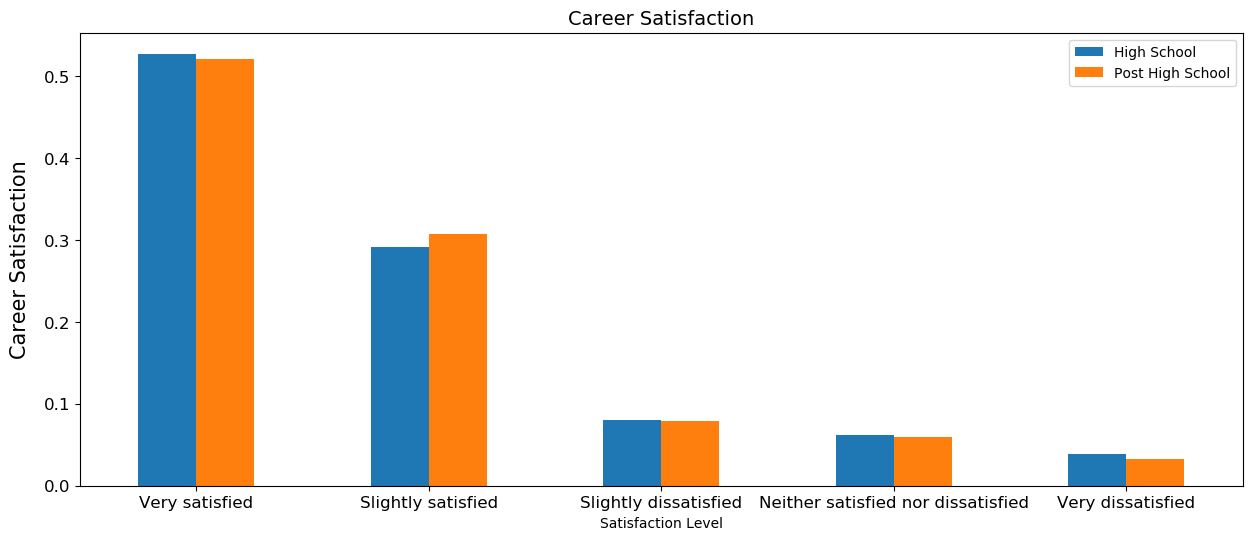

In [15]:
# How do they compare in career satisfaction?
a = HighSchool_SomeCollege.CareerSat.value_counts(normalize=True)
b = AboveHighSchool.CareerSat.value_counts(normalize=True)

a = a.reset_index()
a.columns = ['Satisfaction Level', 'High School']

b = b.reset_index()
b.columns = ['Satisfaction Level', 'Post High School']

c = pd.merge(a, b, on='Satisfaction Level')

# How do they compare in career satisfaction?
fig, axes = plt.subplots(ncols=1, figsize=(15, 6), dpi=100)
c.plot(kind="bar", x='Satisfaction Level', ax=axes, rot=0)

axes.set_ylabel('Career Satisfaction', size=15, labelpad=10)
axes.tick_params(axis='x', labelsize=12)
axes.tick_params(axis='y', labelsize=12)
axes.set_title('Career Satisfaction', fontsize=14)

plt.show()

**Interestingly, in terms of career satisfaction, both population show similar distribution: about 53% say they are very satisfied, about 31% say they are slightly satisfied. The remaining 15-20% are somewhat dissatisfied or neutral.**

#### What about Job Satisfaction?

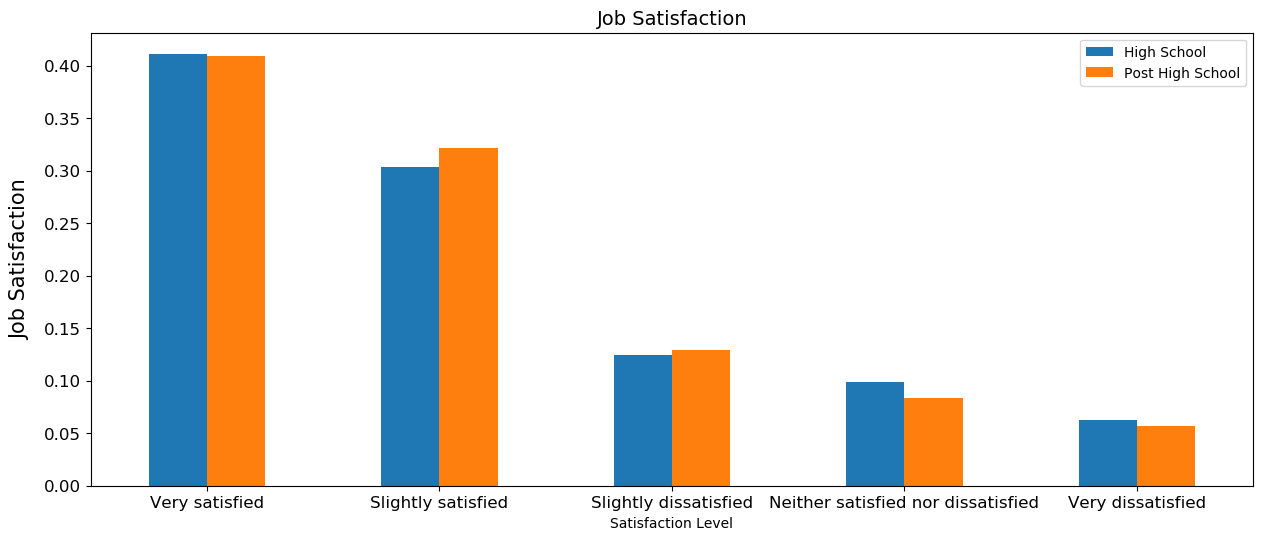

In [16]:
# How do they compare in Job Satisfaction?
a = HighSchool_SomeCollege.JobSat.value_counts(normalize=True)
b = AboveHighSchool.JobSat.value_counts(normalize=True)

a = a.reset_index()
a.columns = ['Satisfaction Level', 'High School']

b = b.reset_index()
b.columns = ['Satisfaction Level', 'Post High School']

c = pd.merge(a, b, on='Satisfaction Level')

# How do they compare in career satisfaction?
fig, axes = plt.subplots(ncols=1, figsize=(15, 6), dpi=100)

c.plot(kind="bar", x='Satisfaction Level', ax=axes, rot=0)

axes.set_ylabel('Job Satisfaction', size=15, labelpad=10)
axes.tick_params(axis='x', labelsize=12)
axes.tick_params(axis='y', labelsize=12)
axes.set_title('Job Satisfaction', fontsize=14)

plt.show()

1. **Interestingly, in terms of job satisfaction, both population show similar distribution: about 41% say they are very satisfied, about 34% say they are slightly satisfied. The rest are either dissatisfied or neutral**
2. **Also, people are more satisfied with their career in Software Engineering than they are with their actual jobs.**

### 2. Are people with high school degrees paid at same rate as people with college education?

In [17]:
df_main.columns

Index(['Respondent', 'Employment', 'EdLevel', 'EduOther', 'OrgSize', 'DevType',
       'YearsCode', 'YearsCodePro', 'Age1stCode', 'CareerSat', 'JobSat',
       'CompTotal', 'ConvertedComp', 'MgrIdiot', 'MgrMoney', 'MgrWant'],
      dtype='object')

There seems to be an error in the values above..a max of $1x10^16 is definitely an error. Since we are dealing with the United States, ConvertedComp should equal CompTotal. ConvertedComp is currency adjusted value of CompTotal i.e. converting to US Dollar

In [18]:
# In order to account for this error, select only rows where 
# Total Compensation [CompTotal] == Converted Compensation [ConveretedComp]
df = df_main[df_main["ConvertedComp"]==df_main["CompTotal"]]
df.describe()

,Respondent,YearsCode,YearsCodePro,Age1stCode,CompTotal,ConvertedComp
count,12878.000000,12871.000000,12876.000000,12826.000000,1.287800e+04,1.287800e+04
mean,44519.633173,14.691166,9.635290,15.158506,1.207046e+05,1.207046e+05
std,25593.372774,9.945693,8.540177,5.221942,7.711404e+04,7.711404e+04
min,4.000000,0.000000,0.000000,5.000000,0.000000e+00,0.000000e+00
25%,22435.500000,7.000000,3.000000,12.000000,8.000000e+04,8.000000e+04
50%,44617.500000,12.000000,7.000000,15.000000,1.070000e+05,1.070000e+05
75%,66529.250000,20.000000,14.000000,18.000000,1.440000e+05,1.440000e+05
max,88878.000000,50.000000,50.000000,55.000000,2.000000e+06,2.000000e+06


In [19]:
# Select only the needed columns
df = df[['EdLevel', 'Employment', 'YearsCodePro', 'CompTotal']]

# View missing values
df.isnull().sum()

EdLevel         69
Employment      13
YearsCodePro     2
CompTotal        0
dtype: int64

Rows with N/A values in the 'CompTotal' column are dropped to maintain the purity of our analysis; Filling NaN fields with values like the mean and median can bias the result of our analysis.

In [20]:
# Drop rows with NaN values in CompTotal
df = df.dropna(subset=['CompTotal'], axis=0)

In [21]:
# For those who are currently employed, does their income compare wih education level
HighSchool = df[df.EdLevel.isin(['Some college/university study without earning a degree', 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'])]
PostHighSchool = df[df["EdLevel"].isin(['Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)', 'Other doctoral degree (Ph.D, Ed.D., etc.)',
        'Professional degree (JD, MD, etc.)'])]

HighSchool.head(5)


,EdLevel,Employment,YearsCodePro,CompTotal
21,Some college/university study without earning ...,Employed full-time,18.0,103000.0
25,Some college/university study without earning ...,Employed full-time,8.0,114000.0
52,"Secondary school (e.g. American high school, G...",Employed full-time,3.0,47300.0
59,"Secondary school (e.g. American high school, G...",Employed full-time,9.0,107000.0
60,Some college/university study without earning ...,Employed full-time,8.0,66000.0


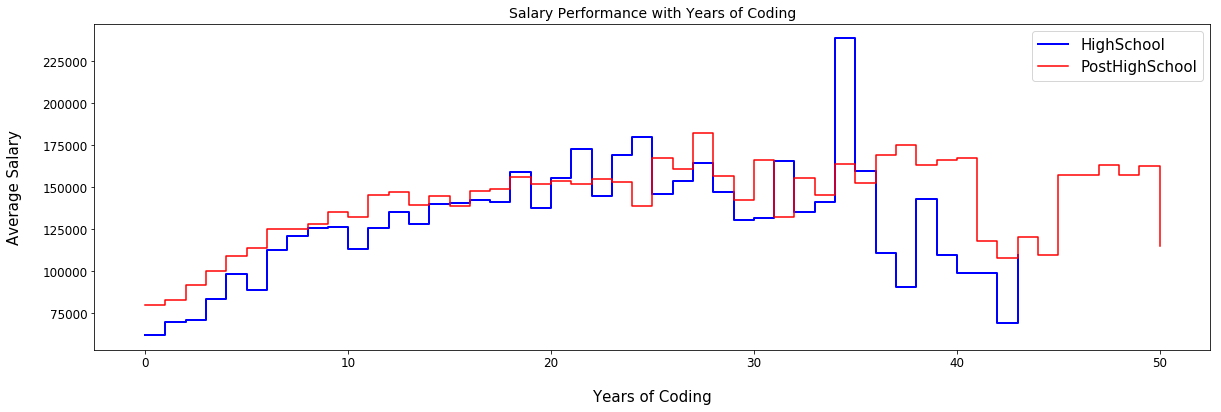

In [22]:
#Plot results 

g1 = HighSchool.groupby("YearsCodePro").mean().reset_index()
g2 = PostHighSchool.groupby("YearsCodePro").mean().reset_index()


fig, ax = plt.subplots(1, 1, figsize=(20, 6))
g1.plot(drawstyle="steps-post", x="YearsCodePro", y="CompTotal", linewidth=2, color='b', ax =ax, label='HighSchool');
g2.plot(drawstyle="steps-post", x="YearsCodePro", y="CompTotal", ax=ax, color='r', label='PostHighSchool');
#g2.plot(kind="scatter", x="YearsCode", y="CompTotal", ax=ax, color='r', label='PostHighSchool');
plt.legend(fontsize=15)

ax.set_ylabel('Average Salary', size=15, labelpad=20)
ax.set_xlabel('Years of Coding', size=15, labelpad=20)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_title('Salary Performance with Years of Coding', fontsize=14);


**From the plot above, people with advanced degrees are clearly earning more than those with only High School degree with the same years of Coding Experience. However, as the years of experience increase, the difference becomes smaller.**

### 3. How do they feel about becoming managers (growth opportunity)?

In [23]:
df = df_main[['EdLevel', 'MgrWant' ]]

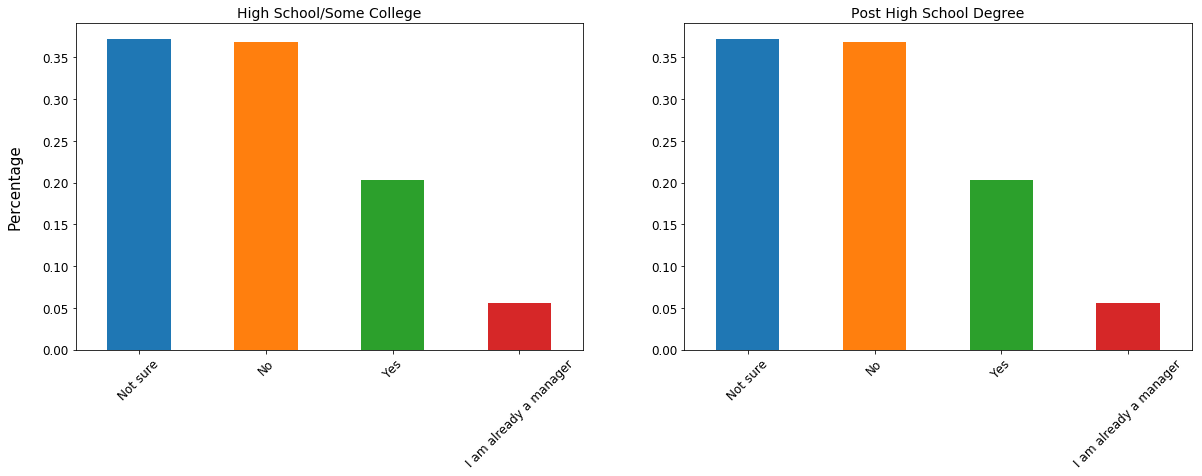

In [24]:
HighSchool = df[df.EdLevel.isin(['Some college/university study without earning a degree', 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'])]
PostHighchool = df[df["EdLevel"].isin(['Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)', 'Other doctoral degree (Ph.D, Ed.D., etc.)',
        'Professional degree (JD, MD, etc.)'])]
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
HighSchool['MgrWant'].value_counts(normalize=True).plot(kind="bar", ax=axes[0], rot=45, label="High School");
HighSchool['MgrWant'].value_counts(normalize=True).plot(kind="bar", ax=axes[1], rot=45, label="Post High School");

axes[0].set_ylabel('Percentage', size=15, labelpad=20)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

axes[0].set_title('High School/Some College', fontsize=14)
axes[1].set_title('Post High School Degree', fontsize=14);

**We observe a similar distribution among those with high school degrees and those with advanced degrees. Might be worth doing, looking at what what factors are common among those who desire to become Managers.**

## 5) Modelling

We will try to predict a person's salary based on their level of education, Developer type, and years of professional coding.

In [25]:
# Get all employment statuses
df_main.Employment.unique()

array(['Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, but looking for work', 'Employed part-time',
       'Not employed, and not looking for work', 'Retired', nan],
      dtype=object)

In [26]:
# Limit modelling to only those that are full-time employed
df = df_main[df_main['Employment']=='Employed full-time']
df.shape

(16206, 16)

In [27]:
def EduStatus(val):
    '''
    function classifies an educational level into post high school, high school or nan if pre-high school 
    input:
        val - string value of the educational level
    '''
    if val in (['Some college/university study without earning a degree', 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)']):
        return "Post High School"
    else:
        if val in (['Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)', 'Other doctoral degree (Ph.D, Ed.D., etc.)',
        'Professional degree (JD, MD, etc.)']):
            return "High School"
        else:
            return np.nan
        
df['Ed Status'] = df.EdLevel.apply(EduStatus)
df.groupby('Ed Status').count()['Respondent']

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Ed Status
High School         13283
Post High School     2057
Name: Respondent, dtype: int64

In [28]:
# Drop non relevant fields
df = df[['Ed Status', 'YearsCodePro', 'CompTotal',]]
df.dropna(inplace=True)      
df = pd.get_dummies(df, columns=['Ed Status']) # Perform one hot encoding for the categorical attribute 'ED Status'

In [29]:
# Create x and y values
y = df['CompTotal']
X = df.drop(['CompTotal'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Using random forest classifier
Classifier = RandomForestRegressor(n_estimators=500)
Classifier.fit(X_train, y_train)
y_test_preds = Classifier.predict(X_test)
print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))

coefs_df = pd.DataFrame()

coefs_df['Features'] = X_train.columns
coefs_df['Coefs'] = Classifier.feature_importances_
coefs_df.sort_values('Coefs', ascending=False).head(20)

-0.0002527805924861237
2.527167045696368e+28


,Features,Coefs
0,YearsCodePro,0.863681
2,Ed Status_Post High School,0.070579
1,Ed Status_High School,0.065740


## 6. Evaluation

1. From the result in the modelling step above, using only `Education Level` and `Years of Professional Coding Experience` to predict compensation, `Years of Professional Coding Experience` plays the most crucial role in determining compensation. Having a post high school degree has a comparatively similar effect as not having one when determining compensation as seen in the low values above. This follows along with our analysis to Q2 about how compensation varies between the two population. <br>
2. However, as seen from the population distribution of those who were `Employed full-time`,13,283 of them ha post high school education while only 2057 had highest education as high school or some college, it is possible that it is more challenging to get a job when you only have high school diploma and some college; but if you do get one, you can expect to receive a competitive salary.